<a href="https://colab.research.google.com/github/gittEze/NewsBiasAnalysis_Word2VecVisualization/blob/main/An%C3%A1lisis_de_sesgos_en_noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

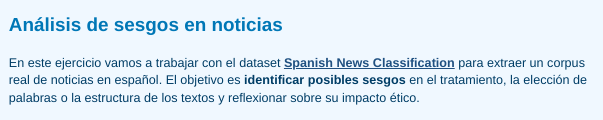

In [ ]:
!pip install gensim

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 50.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv("df_total.csv")

df.head(10)

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
5,https://www.larepublica.co/redirect/post/3225281,El emprendimiento del sector inmobiliario Rent...,Alianzas
6,https://www.bbva.com/es/mx/mexico-y-el-desafio...,El país tiene pendiente generar más y mejores ...,Macroeconomia
7,https://www.bbva.com/es/podcast-agile-en-la-un...,En el 'podcast' tenemos el placer de entrevist...,Innovacion
8,https://www.bbva.com/es/la-ingenieria-social-e...,"El factor humano, normalmente identificado com...",Innovacion
9,https://www.bbva.com/es/que-hace-un-developer-...,Los perfiles que se demandan en un banco han e...,Innovacion


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1217 non-null   object
 1   news    1217 non-null   object
 2   Type    1217 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


(1217, 3)

In [ ]:
corpus = df['news'].tolist()

In [ ]:
sentences = [frase.lower().split() for frase in corpus]

print(sentences[0])

['durante', 'el', 'foro', 'la', 'banca', 'articulador', 'empresarial', 'para', 'el', 'desarrollo', 'sostenible', 'el', 'director', 'de', 'sostenibilidad', 'y', 'clientes', 'globales', 'de', 'bbva', 'en', 'colombia', 'andrés', 'garcía', 'aseguró', 'que', 'es', 'importante', 'entender', 'que', 'la', 'sostenibilidad', 'no', 'la', 'podemos', 'asociar', 'a', 'mayores', 'costos.', 'yo', 'creo', 'que', 'el', 'no', 'tener', 'un', 'concepto', 'de', 'negocio', 'sostenible', 'puede', 'tener', 'un', 'mayor', 'impacto', 'de', 'lo', 'que', 'imaginamos.para', 'garcía', 'el', 'reto', 'más', 'importante', 'es', 'no', 'cambiar', 'prioridades', 'ni', 'que', 'compitan', 'entre', 'sí', 'necesariamente.', 'en', 'muchos', 'de', 'los', 'casos', 'se', 'debe', 'tratar', 'de', 'mantener', 'la', 'prioridad', 'en', 'cuanto', 'a', 'la', 'ambición', 'de', 'negocios', 'más', 'sostenibles', 'un', 'reto', 'enorme', 'por', 'la', 'coyuntura.', 'la', 'sostenibilidad', 'nos', 'abre', 'oportunidades', 'a', 'mejores', 'fuent

In [ ]:
model = Word2Vec(
    sentences,
    vector_size=50,
    window=3,
    min_count=1,
    workers=4,
    sg=1
)

print(model.wv["modelo"])
print(len(model.wv["modelo"]))

[-2.48561740e-01 -2.43807197e-01  1.89779758e-01  6.73994655e-03
 -6.83713436e-01 -2.10713640e-01  2.05920398e-01  1.38887301e-01
 -3.12707186e-01 -2.66229838e-01  3.19943100e-01 -1.69994041e-01
  2.48366520e-01  3.00707877e-01 -1.47627413e-01  3.43372226e-01
  7.61357188e-01 -4.11298797e-02 -1.04698014e+00 -7.64299512e-01
  1.00687361e+00  2.84605712e-01  1.21883011e+00 -3.63217413e-01
 -1.58477306e-01  2.37311982e-02 -1.42286927e-01  2.10697189e-01
 -5.14236748e-01  4.50026035e-01  4.49543625e-01 -7.25789428e-01
  5.11705160e-01  6.68517277e-02  1.11617155e-01 -4.09530908e-01
  4.81306016e-01  9.37248394e-02 -3.13057490e-02 -2.10908979e-01
  4.89269227e-01  4.03275772e-04 -5.21294773e-01  2.43105486e-01
  4.90713716e-01  5.79426065e-02 -1.39563873e-01 -5.33549309e-01
  5.36478937e-01  3.04105312e-01]
50


In [ ]:
palabras_a_graficar = [
   "mujer",
   "hombre",
   "feminista",
   "machista",
   "inmigrante",
   "extranjero",
   "refugiado",
   "joven",
   "anciano",
   "adulto",
   "niño",
   "rico",
   "pobre",
   "trabajador",
   "empresario",
   "desempleado"
]

palabras_validas = [p for p in palabras_a_graficar if p in model.wv]
print("Palabras que se van a graficar:", palabras_validas)

Palabras que se van a graficar: ['mujer', 'hombre', 'extranjero', 'refugiado', 'joven', 'adulto', 'niño', 'rico', 'pobre', 'trabajador', 'empresario']


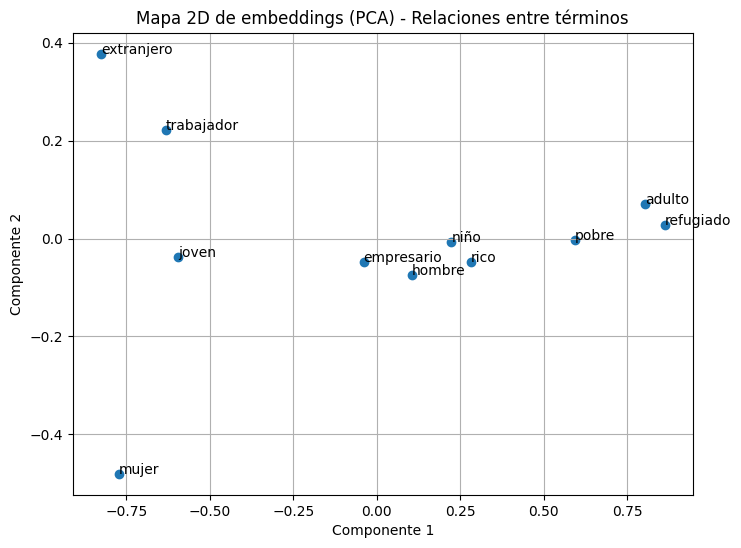

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vectores = [model.wv[p] for p in palabras_validas]

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(vectores)

plt.figure(figsize=(8,6))

x_vals = coords_2d[:, 0]
y_vals = coords_2d[:, 1]

plt.scatter(x_vals, y_vals)

for i, palabra in enumerate(palabras_validas):
    plt.annotate(palabra, (x_vals[i], y_vals[i]))

plt.title("Mapa 2D de embeddings (PCA) - Relaciones entre términos")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()